# 선형회귀 기초

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from sklearn.datasets import make_regression
bias = 100
#회귀분석 시험용 가상데이터 생성
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=1)

In [3]:
#numpy 행합치기
X = np.hstack([np.ones_like(X0), X0])
np.ones_like(X0)[:5] # no.ones_like(X0) : X0 사이즈와 동일한데 내용물은 1인 행렬 생성

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [4]:
#데이터 살펴보기
X[:5]

array([[ 1.        , -0.61175641],
       [ 1.        , -0.24937038],
       [ 1.        ,  0.48851815],
       [ 1.        ,  0.76201118],
       [ 1.        ,  1.51981682]])

In [5]:

y = y.reshape(len(y), 1)
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print("bias:", bias)
print("coef:", coef)
print("w:\n", w)

bias: 100
coef: 80.71051956187792
w:
 [[102.02701439]
 [ 81.59750943]]


In [6]:
np.linalg.inv(np.dot(X.T, X))

array([[ 0.01004684, -0.00077323],
       [-0.00077323,  0.01276322]])

In [10]:
#패키지 안에 있는 데이터 로드하기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
dfX_diabetes = pd.DataFrame(diabetes.data, columns=["X%d" % (i+1) for i in range(np.shape(diabetes.data)[1])])
dfy_diabetes = pd.DataFrame(diabetes.target, columns=["target"])
df_diabetes0 = pd.concat([dfX_diabetes, dfy_diabetes], axis=1)
#데이터 살펴보기
df_diabetes0.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [9]:
#회귀분석 후 계수와 절편 살펴보기
from sklearn.linear_model import LinearRegression
model_diabetes = LinearRegression().fit(diabetes.data, diabetes.target)
print(model_diabetes.coef_)
print(model_diabetes.intercept_)

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
152.1334841628965


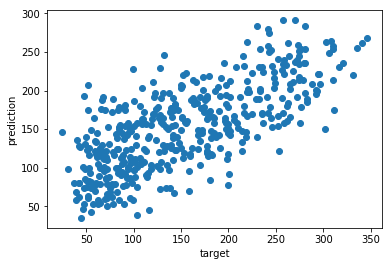

In [12]:
#predction
predictions = model_diabetes.predict(diabetes.data)
plt.scatter(diabetes.target, predictions)
plt.xlabel("target")
plt.ylabel("prediction")
plt.show()

In [13]:
# MAE 구하기
mean_abs_error = (np.abs(((diabetes.target - predictions)/diabetes.target)*100)).mean()
print("MAE: %.2f%%" % (mean_abs_error))

MAE: 38.79%


In [15]:
import sklearn as sk
#MAE 출력
sk.metrics.median_absolute_error(diabetes.target, predictions)


38.52283366266063

In [16]:
# MSE출력
sk.metrics.mean_squared_error(diabetes.target, predictions)


2859.6903987680657

In [25]:
#OLS 클래스는 자동으로 상수항을 만들어주지 않기 때문에 사용자가 add_constant 명령으로 상수항을 추가해야
import statsmodels.api as sm

df_diabetes = sm.add_constant(df_diabetes0)
df_diabetes.tail()

,const,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,target
437,1.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,1.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,1.0,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,1.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,1.0,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [20]:
#statsmodels.regression.linear_model.OLS(endog, exog=None)
# 입력 인수
# endog : 종속 변수. 1차원 배열
# exog : 독립 변수, 2차원 배열.

#a모델 적합
model_diabetes2 = sm.OLS(df_diabetes.ix[:, -1], df_diabetes.ix[:, :-1])
result_diabetes2 = model_diabetes2.fit()
result_diabetes2

C:\Users\q\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [21]:
model_diabetes2 = sm.OLS(df_diabetes.ix[:, -1], df_diabetes.ix[:, :-1])
result_diabetes2 = model_diabetes2.fit()
result_diabetes2

C:\Users\q\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [22]:
#모델 결과
print(result_diabetes2.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           3.83e-62
Time:                        02:42:35   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

In [29]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston0 = pd.concat([dfX_boston, dfy_boston], axis=1)
df_boston0.tail()

df_boston = sm.add_constant(df_boston0)
model_boston2 = sm.OLS(df_boston.ix[:, -1], df_boston.ix[:, :-1])
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 16 Jan 2019   Prob (F-statistic):          6.95e-135
Time:                        02:46:16   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

C:\Users\q\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


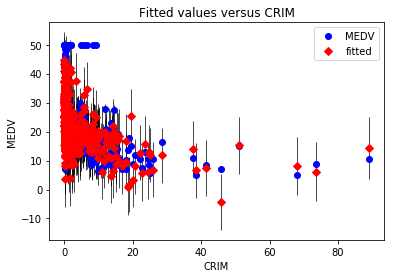

In [30]:
# statsmodel는 다양한 회귀 분석 결과 플롯도 제공한다.

# plot_fit(results, exog_idx) Plot fit against one regressor.
# abline_plot([intercept, ...]) Plots a line given an intercept and slope.
# influence_plot(results[, ...]) Plot of influence in regression.
# plot_leverage_resid2(results) Plots leverage statistics vs.
# plot_partregress(endog, ...) Plot partial regression for a single regressor.
# plot_ccpr(results, exog_idx) Plot CCPR against one regressor.
# plot_regress_exog(results, ...) Plot regression results against one regressor.


sm.graphics.plot_fit(result_boston2, "CRIM")
plt.show()

# 아웃라이어 등

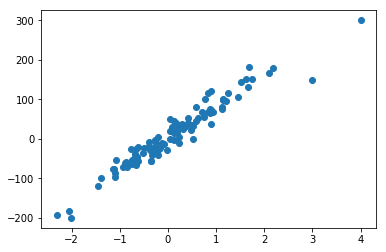

In [31]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=1)

# add high-leverage points
X0 = np.vstack([X0, np.array([[4],[3]])])
X = sm.add_constant(X0)
y = np.hstack([y, [300, 150]])
plt.scatter(X0, y)
plt.show()

In [35]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           1.61e-61
Time:                        02:49:24   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

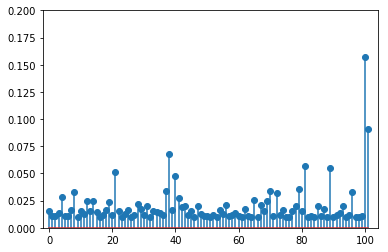

hat.sum() = 2.0000000000000004


In [36]:
# 레버리지(Leverage)
# 개별적인 데이터 표본 하나하나가 회귀분석 결과에 미치는 영향력은 레버리지 분석을 통해 알 수 있다.
# 레버리지는 실제 종속변수 값 y가 예측치(predicted target) y^(y hat)에 미치는 영향을 나타낸 값이다.
# 레버리지는 RegressionResults 클래스의 get_influence 메서드로 구할 수 있다.
influence = result.get_influence()
hat = influence.hat_matrix_diag
plt.stem(hat)
plt.axis([ -2, len(y)+2, 0, 0.2 ])
plt.show()
print("hat.sum() =", hat.sum())
#수동으로 추가한 마지막 두 개의 데이터를 제외하면 대부분의 데이터는 레버리지 값이 0.02 근처의 낮은 값을 가진다.


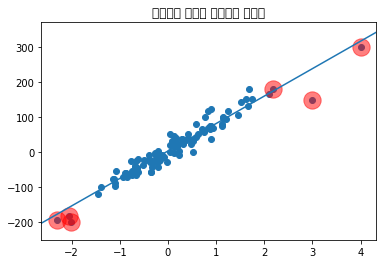

In [37]:
# 레버리지가 큰 데이터만 표시
#f =레버리지값 0.05이상
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.title("회귀분석 결과와 레버리지 포인트")
plt.show()

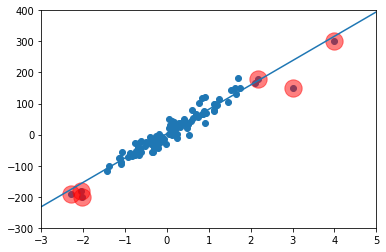

In [38]:
# 레버리지가 큰 데이터가 모형에 주는 영향을 보기 위해 이 데이터가 포함된 경우의 모형과 포함되지 않은 경우의 모형을 아래에 비교하였다. 
#레버리지가 큰 데이터는 포함되거나 포함되지 않는가에 따라 모형에 주는 영향이 큰 것을 알 수 있다.

plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=plt.gca())

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.axis([-3, 5, -300, 400])
plt.show()



In [ ]:
#위 그림에서 데이터가 무리지어 있지 않고 단독으로 존재할수록 레버리지가 커짐을 알 수 있다.


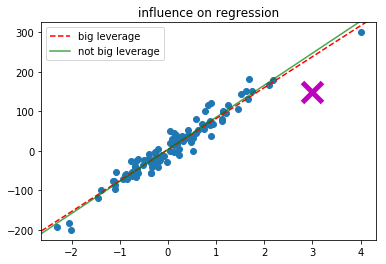

In [42]:
# 레버리지가 큰 데이터가 모형에 주는 영향을 보기 위해 이 데이터가 포함된 경우의 모형과 포함되지 않은 경우의 모형을 아래에 비교하였다. 레버리지가 큰 데이터는 포함되거나 포함되지 않는가에 따라 모형에 주는 영향이 큰 것을 알 수 있다.


model2 = sm.OLS(y[:-1], X[:-1])
result2 = model2.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result,
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result2,
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[-1], y[-1], marker='x', c="m", ms=20, mew=5)
plt.legend([u"big leverage", u"not big leverage"],
           loc="upper left")
plt.title("influence on regression")
plt.show()

In [ ]:
#반대로 레버리지가 작은 데이터는 포함되거나 포함되지 않거나 모형이 별로 달라지지 않는 것을 알 수 있다.

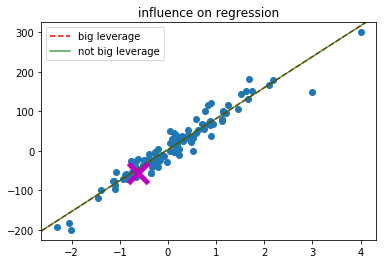

In [43]:
model3 = sm.OLS(y[1:], X[1:])
result3 = model3.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result,
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result3,
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[0], y[0], marker='x', c="m", ms=20, mew=5)
plt.legend([u"big leverage", u"not big leverage"],
           loc="upper left")
plt.title("influence on regression")
plt.show()

In [ ]:
#혹은 레버리지가 크더라도 오차가 작은 데이터는 포함되거나 포함되지 않거나 모형이 별로 달라지지 않는다.

# 아웃라이어

In [ ]:
# 모형에서 설명하고 있는 데이터와 동떨어진 값을 가지는 데이터, 즉 잔차가 큰 데이터를 아웃라이어(outlier)라고 한다. 
# 그런데 잔차의 크기는 독립 변수의 영향을 받으므로 아웃라이어를 찾으러면 이 영향을 제거한 표준화된 잔차를 계산해야 한다.



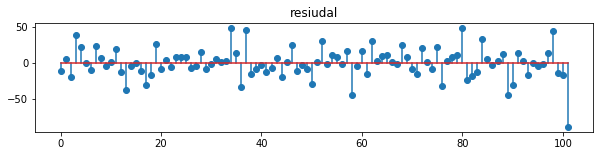

In [45]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.title("resiudal")
plt.show()